## Final Project machine learning ini akan menggunakan teknik Linear regression karena akan menentukan jumlah populasi di suatu negara ke depannya

pengamatan data atas populasi negara China yang diperoleh dari https://www.kaggle.com/datasets/anandhuh/population-data-china

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import pickle



## Data Loading & Exploratory Data Analysis

In [2]:
df_pop_chn = pd.read_csv(r'C:\Users\Dimas\Downloads\china_population.csv')

print(df_pop_chn.info())
print(df_pop_chn.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          18 non-null     int64  
 1   Population                    18 non-null     int64  
 2   Yearly % Change               18 non-null     float64
 3   Yearly Change                 18 non-null     int64  
 4   Migrants (net)                18 non-null     int64  
 5   Median Age                    18 non-null     float64
 6   Fertility Rate                18 non-null     float64
 7   Density (P/Km²)               18 non-null     int64  
 8   Urban Pop %                   18 non-null     float64
 9   Urban Population              18 non-null     int64  
 10  Country's Share of World Pop  18 non-null     float64
 11  World Population              18 non-null     int64  
 12  China Global Rank             18 non-null     int64  
dtypes: floa

<AxesSubplot:xlabel='Year'>

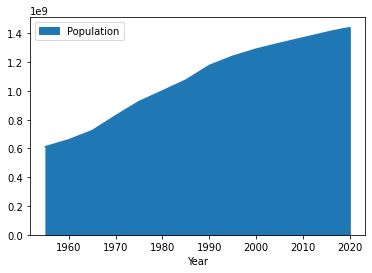

In [3]:
df_Year_pop = df_pop_chn[['Year','Population']]
df_Year_pop.set_index("Year",inplace=True)
df_Year_pop.plot(kind="area")

## Data Preprocessing

In [4]:
df_Year_pop_1 = df_pop_chn[['Year','Population']]


## Pendefinisian Model

In [5]:
model = LinearRegression()

fitur = np.array(df_Year_pop_1.Year).reshape(-1,1)
target =np.array(df_Year_pop_1.Population)

model.fit(fitur,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

## Pelatihan Model

In [6]:
target_predict = model.predict(fitur)

In [7]:
r_sq = model.score(fitur, target) 
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9769393953781043


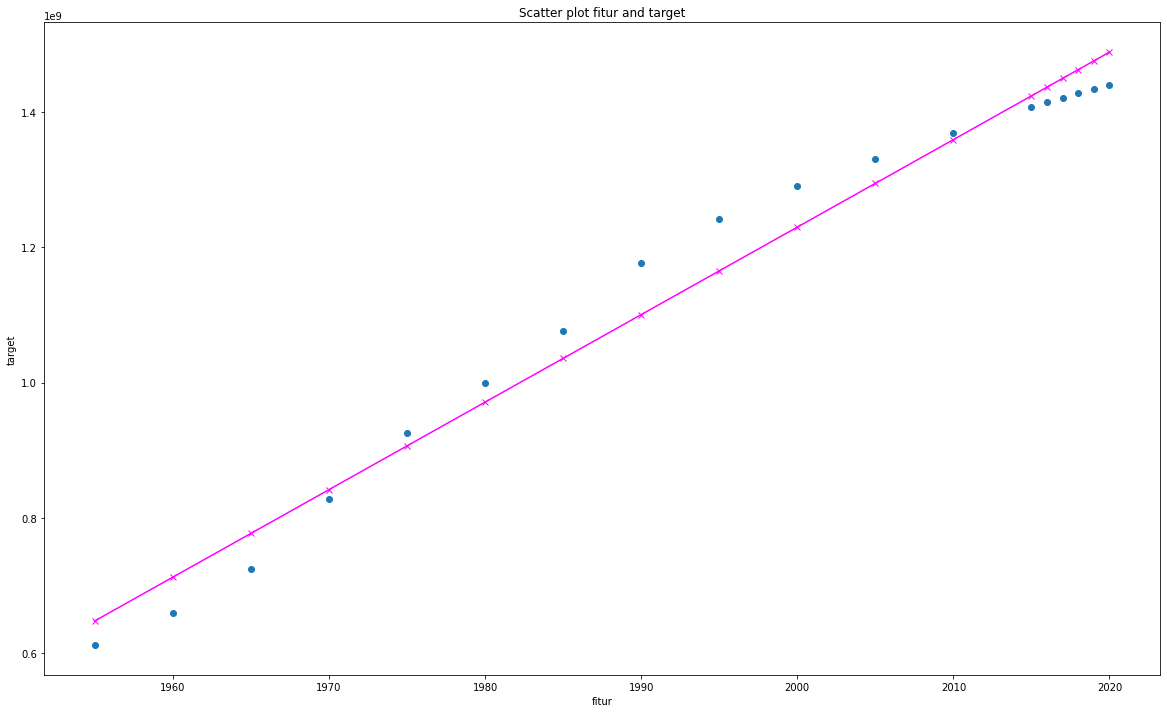

In [8]:
plt.figure(figsize=(20,12))
plt.scatter(fitur, target)##plot actual
plt.plot(fitur, target_predict,color='Magenta',marker='x') ##plot prediski

plt.title('Scatter plot fitur and target')
plt.xlabel('fitur')
plt.ylabel('target')

plt.show()

In [9]:
#prediksi populasi di china tahun 2025 sebesar 1.5 M penduduk
float(model.predict([[2025]]))

1552721029.8208199

In [10]:
# extra - mendapatkan formula matematik untuk garis linear regression
print("coefficient", model.coef_)
print("intercept", model.intercept_)
print("formula untuk garis lurus y = ax + c, a = coefficient, c = intercept")
print("y = " + str(model.coef_[0]) + "x + " + str(model.intercept_))

coefficient [12922473.61220685]
intercept -24615288034.898045
formula untuk garis lurus y = ax + c, a = coefficient, c = intercept
y = 12922473.612206846x + -24615288034.898045


## Kesimpulan : prediksi dengan menggunkan Linear Regression dianggap tepat. hasil prediksi yang diharapkan bersifat numberic
## karena memperhitungkan jumlah penduduk di china kedepan nya

## SAVE Model

In [11]:
pickle.dump(model,open('model_LR.pkl','wb'))

In [12]:
model_L_reg = pickle.load(open('model_LR.pkl', 'rb'))

In [13]:
model_L_reg.predict([[2024]])

array([1.53979856e+09])